# Logistic Regression Based Data Generation Function for Uplift Classification Problem
This Data Generation Function uses Logistic Regression as the underlying data generation model.
This function enables better control of feature patterns: how feature is associated with outcome baseline and treatment effect. It enables 6 differernt patterns: Linear, Quadratic, Cubic, Relu, Sine, and Cosine. 

This notebook shows how to use this data generation function to generate data, with a visualization of the feature patterns.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

### Import Data Generation Function

In [2]:
from causalml.dataset import make_uplift_classification_logistic

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.


### Generate Data

In [47]:
df, feature_name = make_uplift_classification_logistic( n_samples=100000,
                                                        treatment_name=['control', 'treatment1', 'treatment2', 'treatment3'],
                                                        y_name='conversion',
                                                        n_classification_features=10,
                                                        n_classification_informative=5,
                                                        n_classification_redundant=0,
                                                        n_classification_repeated=0,
                                                        n_uplift_dict={'treatment1': 2, 'treatment2': 2, 'treatment3': 3},
                                                        n_mix_informative_uplift_dict={'treatment1': 1, 'treatment2': 1, 'treatment3': 0},
                                                        delta_uplift_dict={'treatment1': 0.05, 'treatment2': 0.02, 'treatment3': -0.05},
                                                       feature_association_list = ['linear','quadratic','cubic','relu','sin','cos'],
                                                       random_select_association = False,
                                                       random_seed=20200416
                                                        
                                                      )

In [48]:
df.head()

,treatment_group_key,x1_informative,x1_informative_transformed,x2_informative,x2_informative_transformed,x3_informative,x3_informative_transformed,x4_informative,x4_informative_transformed,x5_informative,...,conversion_prob,control_conversion_prob,control_true_effect,treatment1_conversion_prob,treatment1_true_effect,treatment2_conversion_prob,treatment2_true_effect,treatment3_conversion_prob,treatment3_true_effect,conversion
0,treatment1,-0.194205,-0.192043,1.791408,1.572609,0.678028,0.080696,-0.169306,-0.683035,-1.837155,...,0.126770,0.076138,0.0,0.126770,0.050632,0.087545,0.011407,0.029396,-0.046742,0
1,treatment1,-0.898070,-0.894462,0.252125,-0.663393,-0.842844,-0.156004,-0.047769,-0.683035,-0.251752,...,0.064278,0.070799,0.0,0.064278,-0.006522,0.101076,0.030277,0.050778,-0.020021,0
2,treatment1,0.701002,0.701325,0.239320,-0.667867,1.700766,1.278676,-0.734568,-0.683035,-1.130113,...,0.018480,0.014947,0.0,0.018480,0.003534,0.018055,0.003109,0.019327,0.004380,0
3,control,-1.653684,-1.648524,-0.119123,-0.698492,-0.037645,-0.000355,0.687429,0.495943,-1.427400,...,0.102799,0.102799,0.0,0.101410,-0.001390,0.040230,-0.062569,0.030753,-0.072046,0
4,treatment3,1.057909,1.057498,-2.019523,2.190564,-0.950180,-0.223370,-1.505741,-0.683035,-0.399457,...,0.012964,0.106241,0.0,0.171309,0.065068,0.114526,0.008285,0.012964,-0.093277,0


In [49]:
feature_name

['x1_informative',
 'x2_informative',
 'x3_informative',
 'x4_informative',
 'x5_informative',
 'x6_irrelevant',
 'x7_irrelevant',
 'x8_irrelevant',
 'x9_irrelevant',
 'x10_irrelevant',
 'x11_uplift',
 'x12_uplift',
 'x13_uplift',
 'x14_uplift',
 'x15_uplift',
 'x16_uplift',
 'x17_uplift',
 'x18_mix',
 'x19_mix']

### Experiment Group Mean

In [50]:
df.groupby(['treatment_group_key'])['conversion'].mean()

treatment_group_key
control       0.09896
treatment1    0.15088
treatment2    0.12042
treatment3    0.04972
Name: conversion, dtype: float64

### Visualize Feature Pattern

In [51]:
# Extract control and treatment1 for illustration
treatment_group_keys = ['control','treatment1']
y_name='conversion'
df1 = df[df['treatment_group_key'].isin(treatment_group_keys)].reset_index(drop=True)
df1.groupby(['treatment_group_key'])['conversion'].mean()

treatment_group_key
control       0.09896
treatment1    0.15088
Name: conversion, dtype: float64

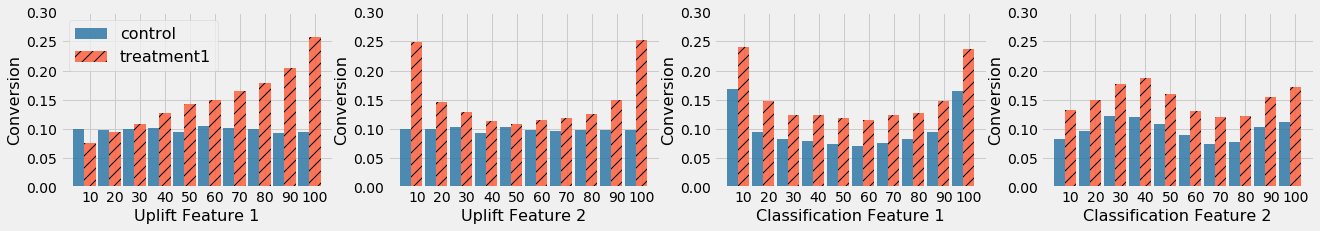

In [53]:
color_dict = {'control':'#2471a3','treatment1':'#FF5733','treatment2':'#5D6D7E'
             ,'treatment3':'#34495E','treatment4':'#283747'}

hatch_dict = {'control':'','treatment1':'//'}

x_name_plot = ['x11_uplift', 'x12_uplift', 'x2_informative', 'x5_informative']

x_new_name_plot = ['Uplift Feature 1', 'Uplift Feature 2', 'Classification Feature 1','Classification Feature 2']
opacity = 0.8

plt.figure(figsize=(20, 3))
subplot_list = [141,142,143,144]
counter = 0
bar_width = 0.9/len(treatment_group_keys)
for x_name_i in x_name_plot:
    bins = np.percentile(df1[x_name_i].values, np.linspace(0, 100, 11))[:-1]
    df1['x_bin'] = np.digitize(df1[x_name_i].values, bins)
    df_gb = df1.groupby(['treatment_group_key','x_bin'],as_index=False)[y_name].mean()
    plt.subplot(subplot_list[counter])
    for ti in range(len(treatment_group_keys)):
        x_index = [ti * bar_width - len(treatment_group_keys)/2*bar_width + xi for xi in range(10)]
        plt.bar(x_index, 
                df_gb[df_gb['treatment_group_key']==treatment_group_keys[ti]][y_name].values, 
                bar_width,
                alpha=opacity,
                color=color_dict[treatment_group_keys[ti]],
                hatch = hatch_dict[treatment_group_keys[ti]],
                label=treatment_group_keys[ti]
               )
    plt.xticks(range(10), [int(xi+10) for xi in np.linspace(0, 100, 11)[:-1]])
    plt.xlabel(x_new_name_plot[counter],fontsize=16)
    plt.ylabel('Conversion',fontsize=16)
    #plt.title(x_name_i)
    if counter == 0:
        plt.legend(treatment_group_keys, loc=2,fontsize=16)
    plt.ylim([0.,0.3])
    counter+=1
    

In the figure above, Uplift Feature 1 has a linear pattern on treatment effect, Uplift Feature 2 has a quadratic pattern on treatment effect, Classification Feature 1 has a quadratic pattern on baseline for both treatment and control, and Classification Feature 2 has a Sine pattern on baseline for both treatment and control.